# Numerical Integration


## Same example:

Calculate the integral of:

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Integration limits
x_0 = 0.
x_1 = np.pi

# Number of evaluation points
n = 100

# x and y vectors
x = np.linspace(x_0, x_1, n)
y = np.sin(x)

## 5. Using scipy:

In [3]:
import scipy as sc # This is to prevent confusion sympy
from scipy import integrate

### 5.1. With the integrate.trapz() or integrate.simpson() function:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html

In [7]:
# Trazpezoidal method

sc_trapezoid = integrate.trapezoid(y, x)

print(sc_trapezoid)

1.9998321638939927


In [8]:
# Simpson method

sc_simpson = integrate.simpson(y, x)

print(sc_simpson)

2.0000000534993037


### 5.2. With the integrate.quad() function:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 

In [9]:
# Define func

def function1(x):
    """
    Function to integrate.
    """
    return np.sin(x)

In [10]:
# Return integral value + error

sc_quad, est_err_quad = integrate.quad(function1, 0., np.pi)

print(sc_quad, est_err_quad)

2.0 2.220446049250313e-14


### 5.3. Double integrals:

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html

#### Example:

Integrate:

$f(x, y) = x\,y^2$ between $x=(0,2)$ and $y=(0,1)$


$\int_0^2 \int_0^1 f(x, y)\,dy\,dx$


$\Rightarrow \int_0^2 \int_0^1 x\,y^2\,dy\,dx$


In [11]:
# Define our domain

x = np.arange(-2., 2., 0.01)
y = np.arange(-2., 2., 0.01)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

# Compute surface
Z = x_2d*y_2d**2

print(Z.shape)

(400, 400)


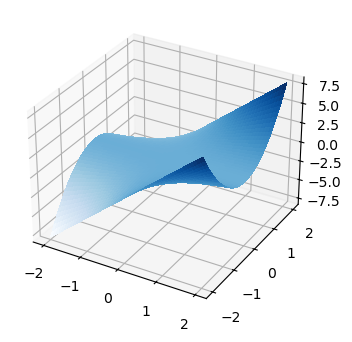

In [12]:
fig, ax = plt.subplots(figsize = (5, 4), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, Z, cmap='Blues', linewidth=0, antialiased=False)

# Customise the z axis.
ax.set_zlim(-8, 8)

plt.show()



### Integral:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html?highlight=dblquad

In [13]:
# Use lambda function

func = lambda y, x: x*y**2

In [14]:
# Call QUAD integrator

result = integrate.dblquad(func, 0., 2., 0., 1.)

print(result)

print("Integral value:", result[0])
print("Error value:", result[1])

(0.6666666666666667, 7.401486830834377e-15)
Integral value: 0.6666666666666667
Error value: 7.401486830834377e-15


### Use sympy (symbolic algebra)

In [15]:
import sympy as sp

In [16]:
# Define symbols
x, y = sp.symbols('x, y')

# Evaluate integral
y_eval = sp.integrate(x*y**2, (y, 0, 1), (x, 0, 2))

print("Integral value is: ", float(y_eval))

Integral value is:  0.6666666666666666


### Example:

Integrate: 

$\int\int f(x,y)\,dy\,dx$, where $f(x,y) = 4\,x\,y- y^3$

in the region bounded by $y = \sqrt{x}$ and $y = x^3$.

In [18]:
# Define our domain
x = np.arange(0, 1.2, 0.01)

# Two functions for the boundaries.
y1 = np.sqrt(x)

y2 = x**3

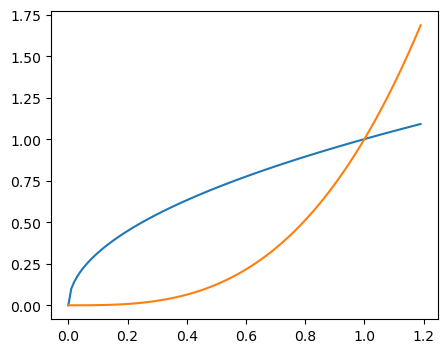

In [19]:
# Plotting
fig, ax = plt.subplots(figsize = (5, 4))

# Plot
ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

In [20]:
# Coordinates for the grid
x = np.arange(0, 1.2, 0.01)
y = np.arange(0, 1.2, 0.01)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

# New surface
Z1 = 4*x_2d*y_2d - y_2d**3

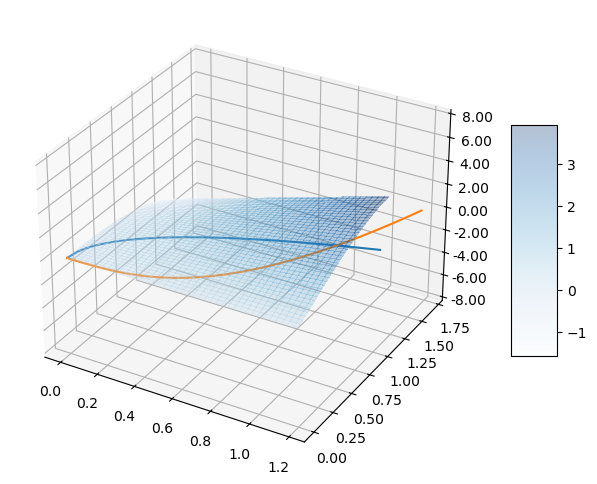

In [21]:
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, Z1, cmap='Blues', linewidth=0, antialiased=False, alpha = 0.3)

# Added boundaries
ax.plot(x, y1)
ax.plot(x, y2)

# Customize the z axis.
ax.set_zlim(-8, 8)

ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Integrals:

#### Using sympy:

In [22]:
# Define symbols
x, y = sp.symbols('x, y')

# Evaluate the integral
y_eval = sp.integrate((4*x*y - y**3), (y, x**3, x**0.5), (x, 0., 1.))

print("Integral value:", y_eval)

Integral value: 0.352564102564102


#### Using dblquad():

In [23]:
# Function to integrate

f1 = lambda y, x: 4*x*y - y**3

In [24]:
# Evaluate the integral

result1 = integrate.dblquad(f1, 0, 1, lambda x: x**3, lambda x: x**0.5)

print("Integral value:", result1[0])
print("Error value:", result1[1])

Integral value: 0.3525641025641026
Error value: 8.05729071063299e-15


### 5.4. Triple integrals:

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html

#### Example:

Integrate:

$f(x, y, z) = x\,y\,z$ between $x=(1,2)$, $y=(2,3)$, $z=(0,1)$


$\int_1^2 \int_2^3 \int_0^1 f(x, y, z)\,dz\,dy\,dx$


$\Rightarrow \int_1^2 \int_2^3 \int_0^1 x\,y\,z\,dz\,dy\,dx$


#### Using sympy:

In [25]:
# Define symbols
x, y, z = sp.symbols('x, y, z')

# Evaluate the 3D integral
y_eval2 = sp.integrate((x*y*z), (z, 0, 1), (y, 2, 3), (x, 1, 2))

print(float(y_eval2))

1.875


#### Using scipy:

In [26]:
# Define the function to integrate

func3d = lambda z, y, x: x*y*z # f takes arguments in the order (z, y, x).

# Evaluate the integral

result2 = integrate.tplquad(func3d, 1, 2, 2, 3, 0, 1)

print("Integral value:", result2[0])
print("Error value:", result2[1])

Integral value: 1.8749999999999998
Error value: 3.3246447942574074e-14


### Example:

Integrate:

$f(x, y, z) = x\,y\,z$ between $x=(0,1)$, $y=(0,1-2x)$, $z=(0,1-x-2y)$


$\int_0^1 \int_0^{1-2x} \int_0^{1-x-2y} f(x, y, z)\,dz\,dy\,dx$


$\Rightarrow \int_0^1 \int_0^{1-2x} \int_0^{1-x-2y} xyz\,dz\,dy\,dx$

#### Using sympy:

In [27]:
# Define symbols
x, y, z = sp.symbols('x, y, z')

# Evaluate the integral
y_eval3 = sp.integrate((x*y*z), (z, 0, 1 - x - 2*y), (y, 0, 1 - 2*x), (x, 0, 1))

print("Integral value: ", float(y_eval3))

Integral value:  0.05416666666666667


#### Using scipy:

In [28]:
#func3d_1 = lambda z, y, x: x*y*z

result3 = integrate.tplquad(func3d, 0, 1, 0, lambda x: 1 - 2*x, 0, lambda x, y: 1 - x -2*y)

print("Integral value: ", result3[0])
print("Error value: ", result3[1])


Integral value:  0.05416666666666668
Error value:  2.1774196738157757e-14


## 6. Integrals with infinity ($\pm\infty$) using sympy:

### Example:

Calculate the integral of:

$f(x) = \int_0^{\infty}\exp(-x^2)\,dx$ 

In [29]:
# Define symbol
x = sp.Symbol('x')

# Evaluate the integral
y = sp.integrate(sp.exp(-x**2), x)

print(y)

sqrt(pi)*erf(x)/2


In [30]:
# Definite integral

y_eval = sp.integrate(sp.exp(-x**2), (x, 0, np.inf))

In [31]:
print(y_eval)

sqrt(pi)/2


In [32]:
print(float(y_eval))

0.886226925452758


### Example:

Calculate the integral of:

$f(x) = \int_{-\infty}^{\infty}\exp(-x^2)\,dx$ 

In [33]:
# Evaluate the integral directly

y_eval2 = sp.integrate(sp.exp(-x**2), (x, -np.inf, np.inf))

In [34]:
print(y_eval2, type(y_eval2))

sqrt(pi) <class 'sympy.core.power.Pow'>


In [35]:
print(float(y_eval2))

1.772453850905516
